# Reference
https://pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [32]:
import cv2
import numpy as np
import imutils

from imutils import contours
from skimage import measure, color
from matplotlib import pyplot as plt

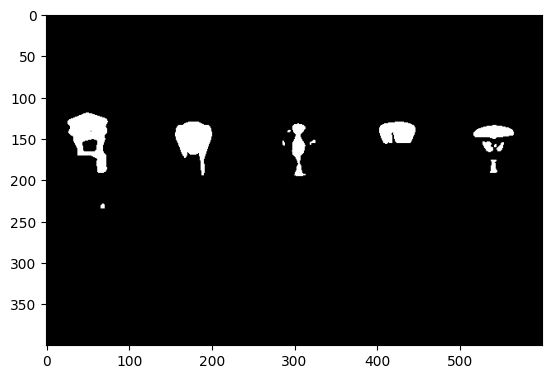

In [14]:
image = cv2.imread('../datasets/multi_bright_regions_sample.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap=plt.cm.gray)

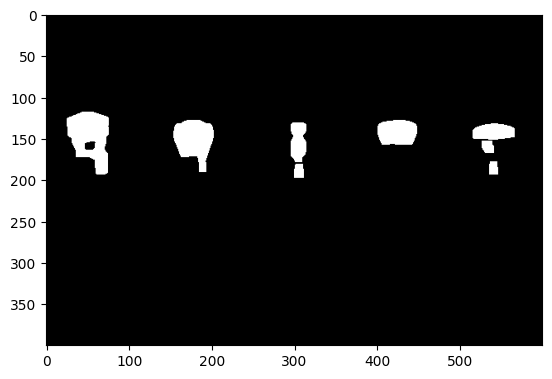

In [15]:
# opening
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

plt.imshow(thresh, cmap=plt.cm.gray)

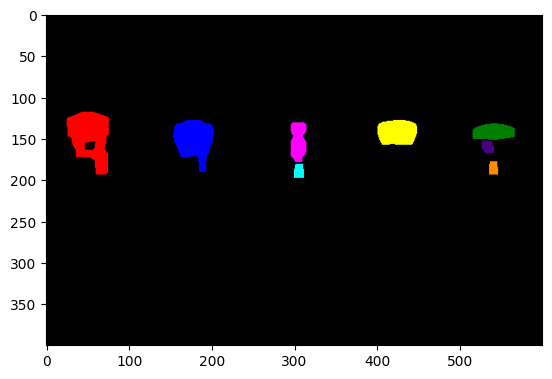

In [23]:
# get connected components
labels = measure.label(thresh, connectivity=2, background=0)
label_img = color.label2rgb(labels)
plt.imshow(label_img)

In [25]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

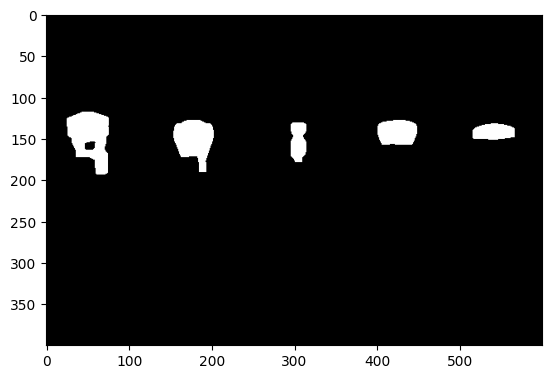

In [28]:
mask = np.zeros(thresh.shape, dtype=np.uint8)
for label in np.unique(labels):
    # 0 is background
    if label == 0:
        continue
    
    
    label_mask = np.zeros(thresh.shape, dtype=np.uint8)
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)
    
    if num_pixels > 300:
        mask = cv2.add(mask, label_mask)
        
plt.imshow(mask, cmap=plt.cm.gray)        

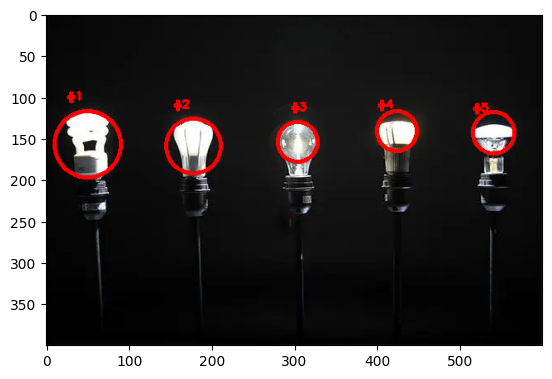

In [40]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts =  cnts[0] if len(cnts) == 2 else cnts[1]
cnts = contours.sort_contours(cnts)[0]

for index, cnt in enumerate(cnts):
    x, y, w, h = cv2.boundingRect(cnt)
    (cx, cy), radius =  cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(cx), int(cy)), int(radius), (0, 0,  255), 3)
    cv2.putText(image, f'#{index+1}', (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))